In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('C:\\Users\\Amin\\Documents\\manutd(2012-2021)\\utdpass(19-20).csv')

In [24]:
df.head()

,Squad,90s,TotalCmp,TotPassAtt,TotCmp%,TotDist,PrgDist,ShortCmp,ShortAtm,ShortCmp%,...,LongAtt,LongCmp%,Ast,xA,A-xA,Pass2Shots,1/3,PPA,CrsPA,Prog
0,Arsenal,38,16349,19802,82.6,321220,94865,6299,7029,89.6,...,3776,64.3,35,29.9,5.1,285,1121,320,70,1240
1,Aston Villa,38,11530,15353,75.1,242867,87449,4292,4999,85.9,...,3846,54.2,32,30.4,1.6,361,891,286,95,1034
2,Bournemouth,38,11943,15973,74.8,234473,86377,4779,5647,84.6,...,3382,52.4,24,27.4,-3.4,267,900,258,53,1069
3,Brighton,38,15696,19549,80.3,317859,103840,5976,6845,87.3,...,4013,62.5,24,26.5,-2.5,327,1091,310,85,1301
4,Burnley,38,9925,14227,69.8,203008,78549,4182,4902,85.3,...,3907,45.4,30,27.2,2.8,263,778,208,78,814


In [25]:
#FINDING MAX AND MIN Assists
max_A=df['Ast'].max()
min_A=df['Ast'].min()

In [26]:
#FINDING MAX AND MIN xA
max_xA=df['xA'].max()
min_xA=df['xA'].min()

In [27]:
#FINDING MAX AND MIN A-xA
max_AmxA=df['A-xA'].max()
min_AmxA=df['A-xA'].min()

In [28]:
#FINDING Pass2Shots
max_P2S=df['Pass2Shots'].max()
min_P2S=df['Pass2Shots'].min()

In [29]:
#FINDING 1/3 passes
max_1x3=df['1/3'].max()
min_1x3=df['1/3'].min()

In [30]:
#FINDING pass into 18 yard box
max_PPA=df['PPA'].max()
min_PPA=df['PPA'].min()

In [31]:
#FINDING cross into 18 yard box
max_CrsPA=df['CrsPA'].max()
min_CrsPA=df['CrsPA'].min()
print(min_CrsPA)

42


In [32]:
#FINDING cross into Progressive Passes
max_Prog=df['Prog'].max()
min_Prog=df['Prog'].min()

In [33]:
df = df[df['Squad']=='Manchester Utd'].reset_index()

In [34]:
df

,index,Squad,90s,TotalCmp,TotPassAtt,TotCmp%,TotDist,PrgDist,ShortCmp,ShortAtm,...,LongAtt,LongCmp%,Ast,xA,A-xA,Pass2Shots,1/3,PPA,CrsPA,Prog
0,11,Manchester Utd,38,17542,21170,82.9,324919,97629,7733,8627,...,3392,63.5,43,37.0,6.0,401,1362,353,53,1500


In [35]:
df = df.drop(['index','90s','TotalCmp','TotPassAtt','TotCmp%','TotDist','PrgDist','ShortCmp','ShortAtm','ShortCmp%','MediumCmp','MediumAtm','MediumCmp%','LongCmp','LongAtt','LongCmp%'],axis=1)

In [36]:
df

,Squad,Ast,xA,A-xA,Pass2Shots,1/3,PPA,CrsPA,Prog
0,Manchester Utd,43,37.0,6.0,401,1362,353,53,1500


In [37]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Ast', 'xA', 'A-xA', 'Pass2Shots', '1/3', 'PPA', 'CrsPA', 'Prog']

In [38]:
#Append values for min range
min_range= []
max_range= []

min_range.append(min_A)
min_range.append(min_xA)
min_range.append(min_AmxA)
min_range.append(min_P2S)
min_range.append(min_1x3)
min_range.append(min_PPA)
min_range.append(min_CrsPA)
min_range.append(min_Prog)

In [39]:
min_range

[18, 23.2, -8.1, 253, 762, 188, 42, 754]

In [40]:
#Append values for max range
max_range.append(max_A)
max_range.append(max_xA)
max_range.append(max_AmxA)
max_range.append(max_P2S)
max_range.append(max_1x3)
max_range.append(max_PPA)
max_range.append(max_CrsPA)
max_range.append(max_Prog)

In [41]:
max_range

[69, 66.2, 17.2, 558, 1916, 598, 105, 2005]

In [42]:
for x in range(len(df['Squad'])):
    if df['Squad'][x] == 'Manchester Utd':
        values = df.iloc[x].values.tolist()
        
values = values[1:]

In [43]:
values

[43, 37.0, 6.0, 401, 1362, 353, 53, 1500]

In [44]:
radar = Radar(params, min_range, max_range,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*8,
              num_rings=3,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [45]:
#We will use mplsoccer’s FontManager to load some fonts from Google Fonts. 
#We borrowed the FontManager from the ridge_map library.

URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

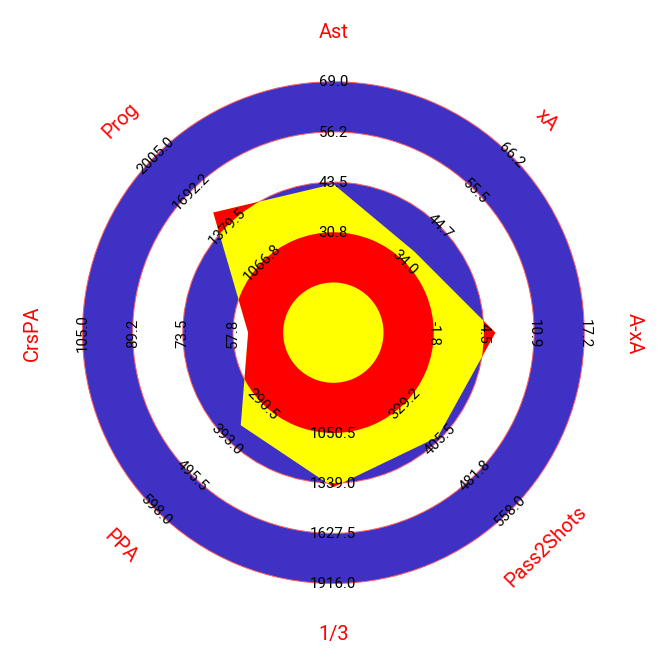

In [60]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#3F31C4', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(values, ax=ax,
                                kwargs_radar={'facecolor': '#ffff00'},
                                kwargs_rings={'facecolor': '#ff0000'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=20,
                                       fontproperties=robotto_regular.prop,color='#ff0000')  # draw the param labels